In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [54]:
df = pd.read_csv("train.csv")
dftest = pd.read_csv("test.csv")

In [55]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [57]:
#veri setindeki eksik değerleri gösterir
def show_missing_values(function_data):
    check_isnull = function_data.isnull().sum()
    check_isnull = check_isnull[check_isnull != 0].sort_values(ascending=False)

    if check_isnull.shape[0] == 0:
        print("Veri setinde eksik bilgi yoktur")
        print(check_isnull)
    else:
        print(check_isnull)
show_missing_values(df) 

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


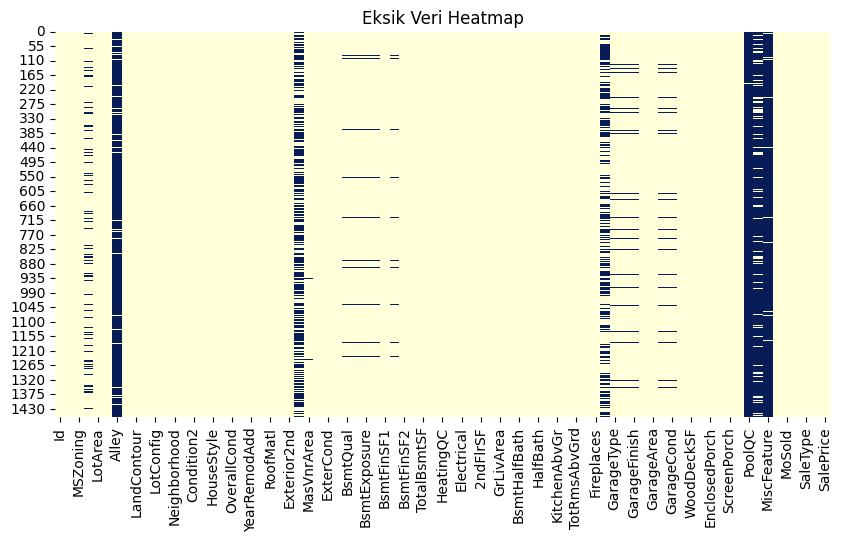

In [58]:
# Isı haritası (heatmap) görselleştirmesi
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="YlGnBu", cbar=False)
plt.title("Eksik Veri Heatmap")
plt.show()


In [59]:
#çok fazla eksik değeri olan sütunları siliyoruz
df.drop(['PoolQC','Fence','MiscFeature'],axis=1, inplace=True)
df.drop(['Id'],axis=1, inplace=True)
df.drop(['Alley'],axis=1, inplace=True)


In [60]:
# Eksik metin sütunlarını bulup en sık görülen değerle dolduruyoruz
missing_text_columns = df.select_dtypes(include=['object']).columns

for col in missing_text_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [61]:
# Eksik sayısal sütunları bulup ortalama değer ile dolduruyoruz
missing_numeric_columns = df.select_dtypes(include=['float', 'int']).columns

for col in missing_numeric_columns:
    df[col].fillna(df[col].mean(), inplace=True)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [62]:
#metin tabanlı sütunları bulup one-hot encoding uyguluyoruz
text_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=text_columns)
df_encoded = df_encoded.astype(int)
df_encoded


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65,8450,7,5,2003,2003,196,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80,9600,6,8,1976,1976,0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68,11250,7,5,2001,2002,162,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60,9550,7,5,1915,1970,0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84,14260,8,5,2000,2000,350,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62,7917,6,5,1999,2000,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85,13175,6,6,1978,1988,119,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66,9042,7,9,1941,2006,0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68,9717,5,6,1950,1996,0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [63]:
#saleprice'a göre korelasyon matrisini hesaplıyoruz
correlation_matrix = df_encoded.corr()
correlation_with_saleprice = correlation_matrix['SalePrice'].sort_values(ascending=False)
correlation_with_saleprice


SalePrice            1.000000
OverallQual          0.790982
GrLivArea            0.708624
GarageCars           0.640409
GarageArea           0.623431
                       ...   
GarageType_Detchd   -0.354141
BsmtQual_TA         -0.498545
GarageFinish_Unf    -0.513906
KitchenQual_TA      -0.519298
ExterQual_TA        -0.589044
Name: SalePrice, Length: 275, dtype: float64

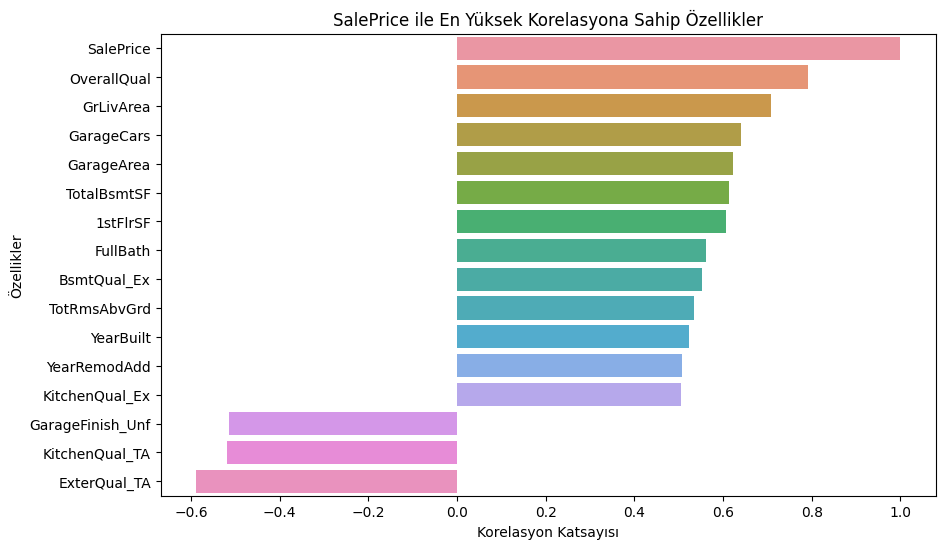

In [64]:
#saleprice ile en fazla korelasyona sahip özellikleri gösteren grafik
top_corr_features = correlation_with_saleprice[abs(correlation_with_saleprice) > 0.5].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr_features.values, y=top_corr_features.index)
plt.title("SalePrice ile En Yüksek Korelasyona Sahip Özellikler")
plt.xlabel("Korelasyon Katsayısı")
plt.ylabel("Özellikler")
plt.show()

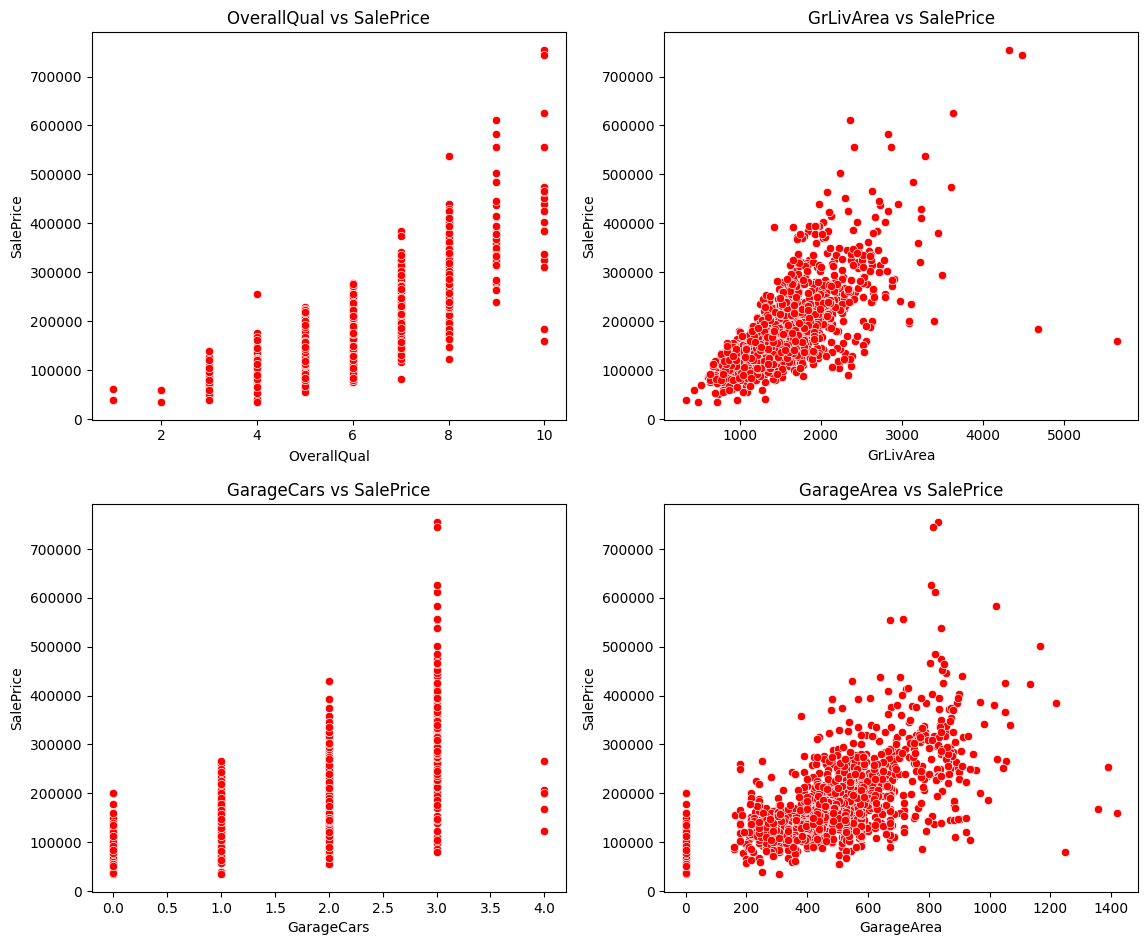

In [65]:
#saleprice ile en çok korelasyona sahip özelliklerin ilişkisi 
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=4.0)

axs = axs.flatten()

features = ['OverallQual','GrLivArea','GarageCars','GarageArea']

for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y='SalePrice', ax=axs[i], color='red')
    axs[i].set_title(f'{feature} vs SalePrice')

plt.show()

In [66]:
#Saleprice ile en fazla korelasyona sahip verilerle yeni data oluşturduk
top_corr_features = correlation_with_saleprice[abs(correlation_with_saleprice) > 0.5].index
selected_features_df = df_encoded[top_corr_features]
selected_features_df = selected_features_df.astype(int)
selected_features_df.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,BsmtQual_Ex,TotRmsAbvGrd,YearBuilt,YearRemodAdd,KitchenQual_Ex,GarageFinish_Unf,KitchenQual_TA,ExterQual_TA
0,208500,7,1710,2,548,856,856,2,0,8,2003,2003,0,0,0,0
1,181500,6,1262,2,460,1262,1262,2,0,6,1976,1976,0,0,1,1
2,223500,7,1786,2,608,920,920,2,0,6,2001,2002,0,0,0,0
3,140000,7,1717,3,642,756,961,1,0,7,1915,1970,0,1,0,1
4,250000,8,2198,3,836,1145,1145,2,0,9,2000,2000,0,0,0,0


In [67]:
#Veriyi kümelere ayırma
from sklearn.model_selection import train_test_split

X = selected_features_df #Bağımsız değişkenler
y = df['SalePrice']  #Bağımlı değişken

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

In [69]:
# Linear Regression modeli oluşturma
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_pred = linear_model.predict(X_test)
linear_r2 = r2_score(y_test, linear_pred)
linear_smape = smape(y_test, linear_pred)

print("Linear Regression R^2:", linear_r2)
print("Linear Regression SMAPE:", linear_smape)

Linear Regression R^2: 1.0
Linear Regression SMAPE: 1.563109053893658e-14


In [70]:
# Random Forest Regression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
rf_smape = smape(y_test, rf_pred)

print("Random Forest Regression R^2:", rf_r2)
print("Random Forest Regression SMAPE:", rf_smape)


Random Forest Regression R^2: 0.9976879328178448
Random Forest Regression SMAPE: 0.3555848877445286


In [72]:
# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

gb_pred = gb_model.predict(X_test)

gb_r2 = r2_score(y_test, gb_pred)
gb_smape = smape(y_test, gb_pred)

print("Gradient Boosting Regression R^2:", gb_r2)
print("Gradient Boosting Regression SMAPE:", gb_smape)


Gradient Boosting Regression R^2: 0.9994798955917107
Gradient Boosting Regression SMAPE: 0.5018304274273877


In [73]:
# Support Vector Regression
from sklearn.svm import SVR
from sklearn.metrics import r2_score

svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

svr_pred = svr_model.predict(X_test)
svr_r2 = r2_score(y_test, svr_pred)
svr_smape = smape(y_test, svr_pred)

print("Support Vector Regression SMAPE:", svr_smape)
print("Support Vector Regression R^2:", svr_r2)


Support Vector Regression SMAPE: 3.232666221482559e-05
Support Vector Regression R^2: 0.9999999999996891


In [74]:
# kNN Regressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
 
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)
knn_r2 = r2_score(y_test, knn_pred)
knn_smape = smape(y_test, knn_pred)

print("kNN Regressor R^2:", knn_r2)
print("kNN Regressor SMAPE:", knn_smape)

kNN Regressor R^2: 0.9892243233051248
kNN Regressor SMAPE: 0.37753901313767374


In [75]:
# Decision Tree Regression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)
dt_r2 = r2_score(y_test, dt_pred)
dt_smape = smape(y_test, dt_pred)

print("Decision Tree Regression R^2:", dt_r2)
print("Decision Tree Regression SMAPE:", dt_smape)

Decision Tree Regression R^2: 0.999237813878629
Decision Tree Regression SMAPE: 0.43164938730349217


In [76]:
# R^2 değerlerine göre sıralama
r2_scores = {
    "Linear Regression": linear_r2,
    "Random Forest Regression": rf_r2,
    "Gradient Boosting Regression": gb_r2,
    "Support Vector Regression": svr_r2,
    "kNN Regressor": knn_r2,
    "Decision Tree Regression": dt_r2
}

sorted_r2_scores = sorted(r2_scores.items(), key=lambda x: x[1], reverse=True)
for model, r2_score in sorted_r2_scores:
    print(f"{model}: {r2_score}")


Linear Regression: 1.0
Support Vector Regression: 0.9999999999996891
Gradient Boosting Regression: 0.9994798955917107
Decision Tree Regression: 0.999237813878629
Random Forest Regression: 0.9976879328178448
kNN Regressor: 0.9892243233051248


In [77]:
#smape değerlerine göre sıralama
smape_scores = {
    "Linear Regression": linear_smape,
    "Random Forest Regression": rf_smape,
    "Gradient Boosting Regression": gb_smape,
    "Support Vector Regression": svr_smape,
    "kNN Regressor": knn_smape,
    "Decision Tree Regression": dt_smape
}

sorted_smape_scores = sorted(smape_scores.items(), key=lambda x: x[1])
for model, smape_score in sorted_smape_scores:
    print(f"{model}: {smape_score}")

Linear Regression: 1.563109053893658e-14
Support Vector Regression: 3.232666221482559e-05
Random Forest Regression: 0.3555848877445286
kNN Regressor: 0.37753901313767374
Decision Tree Regression: 0.43164938730349217
Gradient Boosting Regression: 0.5018304274273877


#### -Verileri değerlendirince Gradient Boosting Regression modeli en yüksek R^2 ve en düşük SMAPE değeriyle en iyi performansa sahip oluyor yani bu değer gerçek değerlere yakın ve tahminlerin doğruluğu açısından diğer modellere göre daha iyi sonuç elde etmiştir.

### En iyi perdormans gösteren modeller sırasıyla:
#### -Gradient Boosting Regression
#### -Decision Tree Regression
#### -Random Forest Regression
#### -kNN Regressor
#### -Support Vector Regression
#### -Linear Regression

### R^2 (R-squared) Değeri: 
Bu metrik, modelin tahminlerinin gerçek değerlerin varyasyonunu ne kadar iyi açıkladığını gösterir. 1'e yaklaşan bir R^2 değeri, tahminlerin gerçek değerlere çok yakın olduğunu gösterir.

### SMAPE (Symmetric Mean Absolute Percentage Error) Değeri: 
Bu metrik, tahmin edilen değerlerin gerçek değerlerle yüzde farklarını ele alarak bir hata ölçüsü sunar. Düşük SMAPE değeri, tahminlerin gerçek değerlere yakın olduğunu ifade eder. Aykırı değerlere daha dayanıklıdır.

### Underfitting: 
 Model, veriyi tam olarak anlayamıyor. Hem eğitim hem de test verilerinde kötü sonuçlar alıyor, çünkü verinin karmaşıklığını yakalayamıyor. Model çok basit veya eksik olabilir.
#### Çözüm: 
 Daha karmaşık bir model kullan, daha fazla öznitelik eklemeye çalış, modeli daha uzun süre eğit.
### Overfitting: 
 Model, eğitim verisine çok fazla odaklanmış ve verinin içindeki hatalara ve gürültülere tepki veriyor. Bu yüzden eğitim verilerinde iyi sonuçlar elde ederken, yeni verilere uyum sağlayamıyor ve test verilerinde kötü performans gösteriyor.
#### Çözüm: 
Daha basit bir model seç, daha az öznitelik kullan, daha fazla veri topla, düzenleme teknikleri uygula.


### One-Hot Encoding: 
Her kategorik değeri ayrı bir sütun olarak temsil eder eğer o sütunda kategori varsa 1 yoksa 0 değerini alır. Sıralama ve derecelendirme olmadığında kullanılır.